# Lab 12: Ordinary differential equations (2)

In this lab we'll continue to explore the use of `solve_ivp` to solve differential equations. In particular, we will look at *anharmonic* oscillators, which occur frequently throughout physics but have more complicated solutions than  familiar simple harmonic motion.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib notebook

## Anharmonic oscillator, version 1: asymmetric potential

First, consider the following potential:

$$\begin{align}
V(x) &= \tfrac12 k x^2(1 - \tfrac23 \alpha x) \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx(1 - \alpha x) \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx(1 - \alpha x)
\end{align}$$

When $\alpha = 0$, this reduces to the familiar harmonic oscillator, but for $\alpha > 0$ this produces a weaker restoring force for positive $x$ than for negative $x$.

To get a sense of this, **plot $V(x)$ for $k = 1$ and $\alpha = \tfrac14$**.

In [7]:
k = 1
alpha = 0.25

def V(x):
    return 0.5*k*(x**2)*(1-(2/3)*alpha*x)

def derivative_anharmonic(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = -k*x0*(1-alpha*x0)
    return np.array((dx0, dx1))

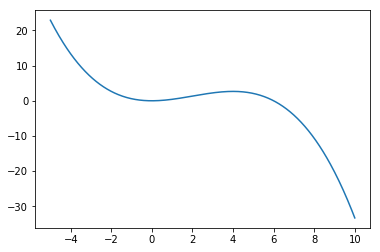

In [8]:
x = np.linspace(-5, 10, 500)
plt.plot(x, V(x))

For the same $k$ and $\alpha$ values as above, **solve this ODE** with initial conditions $x = -1.9$, $v = 0$, considering a large enough time range to see at least three complete oscillations. **Plot $x$ as a function of $t$.** What do you notice about the shape of this curve? Is it what you expect?

In [9]:
def derivative(t, x):
    return -k*x

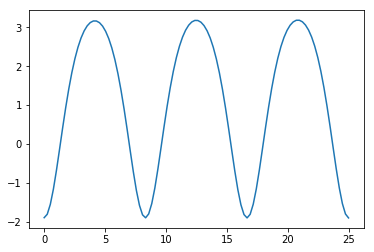

In [10]:
x = np.array([-1.9] + [0])
t = np.arange(0,100, 0.2)

solution = solve_ivp(derivative_anharmonic, (0,25), x, t_eval = np.linspace(0,25,100))

plt.plot(solution.t, solution.y[0,:])

On the same axes, **plot the solution for the same initial conditions and value of $k$, but with $\alpha$ ranging from 0 to 0.3 in steps of 0.05.** How, qualitatively, does $\alpha$ affect the amplitude and period of oscillation?

[0.   0.05 0.1  0.15 0.2  0.25]


<IPython.core.display.Javascript object>


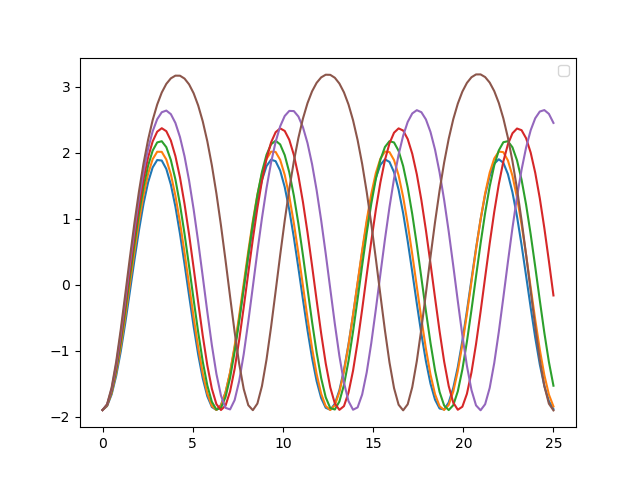

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [18]:
alpha = np.arange(0, 0.3, 0.05)
print(alpha)
x = np.array([-1.9] + [0])
t = np.arange(0,100, 0.05)

def derivative_anharmonic2(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = -k*x0*(1-alpha[i]*x0)
    return np.array((dx0, dx1))

for i in range(len(alpha)):
    solution = solve_ivp(derivative_anharmonic2,(0,25), x, t_eval = np.linspace(0,25,100))

    plt.plot(solution.t, solution.y[0,:])
    plt.legend()

To make this more quantitative, devise a method to **find the first minimum of each of the curves** in that plot – that is, the period of oscillation. **Plot the period $\tau$ as a function of $\alpha$.**

*Hint:* use the `numpy.argmin` function to find the index of the minimum value of $x$, then look up this index in the $t$ array.

In [114]:
?np.argmin

In [10]:
x = np.array([-1.9] + [0])
t = np.arange(0,100, 0.05)
print(alpha)

M = np.array([[1,2], [3,4]])
print(M)
print(np.argmin())

0.25
[[1 2]
 [3 4]]
0


In a similar way, setting $\alpha$ back to $\tfrac14$, **plot solutions on the same axes for initial $x$ values between $0$ and $-2$.** **Plot the period $\tau$ as a function of $x_0$** and hence show that, unlike the harmonic oscillator, this anharmonic oscillator is *not isochronous*, that is, the period $\tau$ depends on the amplitude of oscillation.

▶ **CHECKPOINT 1**

## Anharmonic oscillator, version 2: symmetrical potential

An alternative anharmonic potential has no harmonic (second-order) term at all; instead, the leading term is of even order $p \geq 4$.

$$\begin{align}
V(x) &= \frac kp x^p \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx^{p-1} \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1}
\end{align}$$

**Plot $V(x)$ for $p = 2, 4, 6$.**

**Solve this ODE** for the starting conditions $x = -1.5$, $v = 0$, with $k = 1$ and taking even values of $p$ from 2 to 12. **Plot your solutions**, showing $x$ as a function of time.

Now hold $p = 6$ constant and **plot the solution for a range of initial values of $x$**. Show that, again, an anharmonic oscillator is not isochronous.

▶ **CHECKPOINT 2**

##  Driven oscillations and resonance

We now consider the possibility that the force might depend on $t$ as well as $x$. Specifically, we consider the case of an oscillator "driven" (or "forced") at a particular angular frequency $\omega$:

$$\begin{align}
V(x) &= \frac kp x^p \\
F(t, x) &= -\frac{\mathrm dV}{\mathrm dx} + F(t) = -kx^{p-1} + A\sin(\omega t)\\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1} + A\sin(\omega t)
\end{align}$$

To start with, **solve this new equation** for $k = 1$, $p = 2$, $A = 1$, and $\omega$ distributed between 0.1 and 10. As always, **plot your results.** What do you notice about the amplitude of the oscillations?

The phenomenon that you have observed is called *resonance*. Investigate it by **plotting the amplitude of oscillation against the frequency on a log-log plot**, for frequencies $\omega$ between about 0.01 and 30, and for $p = 2, 4, 6, 8, 10$ (as different curves on the same axes), keeping the other parameters the same. What do you notice about the strength and frequency of the resonance peak?

▶ **CHECKPOINT 3**

**Extension:** investigate the oscillation patterns of the nonlinear oscillators near their resonant frequencies (that is, at frequencies near the peak in the previous graph). Can you explain what is happening?